In [74]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import *


In [75]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [76]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [77]:
df.duplicated().sum()

np.int64(1)

In [78]:
df.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [79]:
df.duplicated().sum()

np.int64(1)

In [80]:
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

In [81]:
df['math score']

0      67
1      40
2      59
3      77
4      78
       ..
995    73
996    85
997    32
998    73
999    65
Name: math score, Length: 1000, dtype: int64

In [82]:
df = pd.concat([df.drop("race/ethnicity",axis = 1),pd.get_dummies(df["race/ethnicity"] , dtype = int )], axis = 1)
df = pd.concat([df.drop("parental level of education",axis = 1),pd.get_dummies(df["parental level of education"] , dtype = int )], axis = 1)
df = pd.concat([df.drop("lunch",axis = 1),pd.get_dummies(df["lunch"] , dtype = int )], axis = 1)
df = pd.concat([df.drop("test preparation course",axis = 1),pd.get_dummies(df["test preparation course"] , dtype = int )], axis = 1)

In [83]:
df

,gender,math score,reading score,writing score,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,1,67,67,63,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,0,40,59,55,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,1,59,60,50,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,1,77,78,68,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,1,78,73,68,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,73,70,65,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
996,1,85,91,92,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
997,0,32,35,41,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
998,0,73,74,82,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [84]:
correlation = df.corr()
cor_target = abs(correlation['math score'])


relevant_features = cor_target[cor_target>0.1]
relevant_features.sort_values()

associate's degree    0.102966
group B               0.106384
group D               0.111121
bachelor's degree     0.117535
group C               0.146533
completed             0.151704
none                  0.151704
some high school      0.179725
gender                0.200863
group E               0.203515
standard              0.374431
free/reduced          0.374431
writing score         0.805944
reading score         0.819398
math score            1.000000
Name: math score, dtype: float64

In [85]:
cor_target = abs(correlation['reading score'])


relevant_features = cor_target[cor_target>0.1]
relevant_features.nlargest(10)

reading score       1.000000
writing score       0.954274
math score          0.819398
standard            0.288282
free/reduced        0.288282
none                0.245144
completed           0.245144
gender              0.189389
some high school    0.151530
group D             0.124821
Name: reading score, dtype: float64

In [86]:
round(df[["math score","reading score","writing score"]].groupby(df["gender"].map({1: "male", 0: 'female'})).mean())

,math score,reading score,writing score
gender,,,
female,63.0,72.0,72.0
male,69.0,66.0,64.0


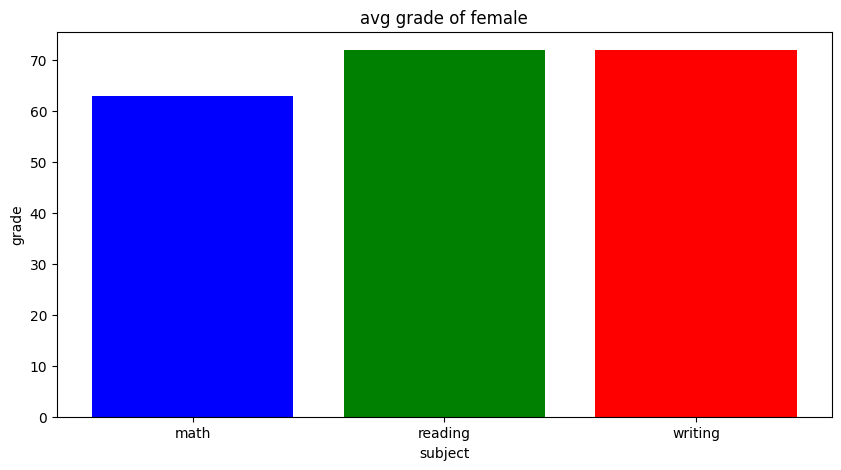

In [98]:
y0 = np.array([63.0,72.0 ,72.0])
x0 = np.array(["math","reading","writing"])
plt.figure(figsize=(10, 5))
plt.title("avg grade of female")
plt.ylabel("grade")
plt.xlabel("subject")
plt.bar(x0,y0,label = 'grade',color=["blue","green","red"])

plt.show()

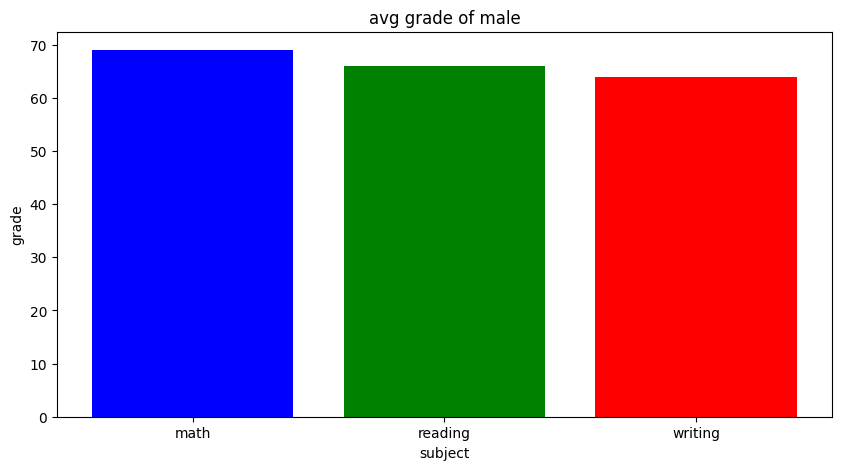

In [100]:
y = np.array([69.0,66.0,64.0])
x = np.array(["math","reading","writing"])
plt.figure(figsize=(10, 5))
plt.title("avg grade of male")
plt.ylabel("grade")
plt.xlabel("subject")
plt.bar(x,y,label = 'grade',color=["blue","green","red"])

plt.show()

In [89]:
df

,gender,math score,reading score,writing score,group A,group B,group C,group D,group E,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,free/reduced,standard,completed,none
0,1,67,67,63,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,0,40,59,55,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,1,59,60,50,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,1,77,78,68,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,1,78,73,68,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,73,70,65,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
996,1,85,91,92,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
997,0,32,35,41,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
998,0,73,74,82,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

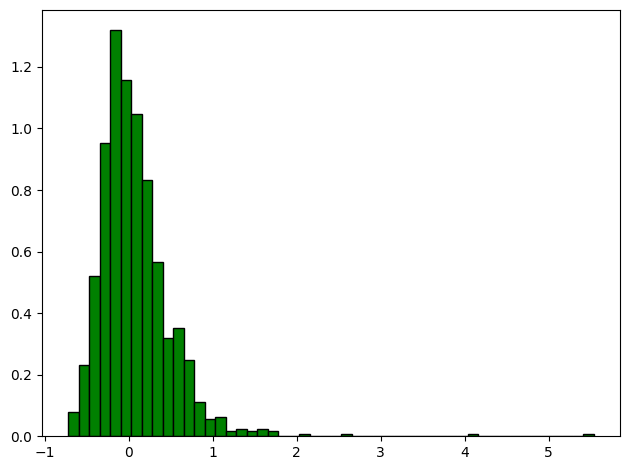

In [101]:
plt.hist(df["math score"].pct_change(),color ='green',edgecolor='black',bins=50,density = True)
plt.tight_layout()
plt.plot(kind = "kde")
plt.show

In [102]:
round(df[["math score","reading score","writing score"]].mean())

math score       66.0
reading score    69.0
writing score    68.0
dtype: float64

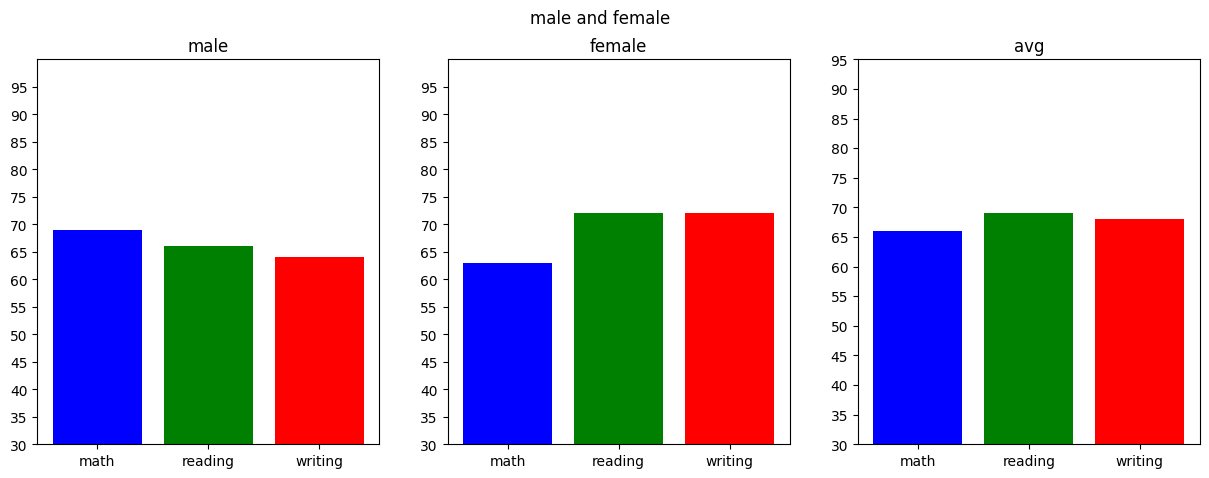

In [109]:
import matplotlib.ticker as ticker
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('male and female')


axs[0].title.set_text('male')
axs[0].bar(x,y,label = 'grade',color=["blue","green","red"])
axs[0].set_yticks(np.arange(30,100,5)) 
axs[0].set_ylim(ymin=30)
axs[0].set_ylim(ymax=100)

axs[1].bar(x0,y0,label = 'grade',color=["blue","green","red"])
axs[1].title.set_text('female')
axs[1].set_yticks(np.arange(30,100,5)) 
axs[1].set_ylim(ymin=30)
axs[1].set_ylim(ymax=100)


y_avg = np.array([66.0,69.0,68.0])
x_avg = np.array(["math","reading","writing"])

axs[2].title.set_text('avg')
axs[2].bar(x_avg,y_avg,label = 'grade',color=["blue","green","red"])
axs[2].set_yticks(np.arange(30,100,5)) 
axs[2].set_ylim(ymin=30)
axs[0].set_ylim(ymax=100)


plt.show()

In [93]:
x = df['gender'].map({1: "male", 0: 'female'})
df[['gender',"math score"]].sort_values(by=["math score"], ascending=False).groupby(x).head(5)



,gender,math score
44,1,100
550,0,100
235,1,100
584,1,100
638,1,100
148,0,100
593,1,100
634,0,100
626,0,96
96,0,95


In [94]:
df[['gender','reading score']].sort_values(by=["reading score"], ascending=False).groupby(x).head(5)

,gender,reading score
857,0,100
396,0,100
273,0,100
441,0,100
281,1,100
754,0,100
825,1,100
748,1,99
842,1,97
593,1,97


In [95]:
df[['gender',"writing score"]].sort_values(by=["writing score"], ascending=False).groupby(x).head(5)

,gender,writing score
441,0,100
396,0,100
550,0,100
281,1,100
129,0,100
604,0,100
593,1,100
825,1,100
64,1,97
224,1,97
